In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("bewerber_aufgabe_interhyp.csv", index_col=0)
df["NPS"] = df["NPS"].fillna(0).map({-100: "unzufrieden", 0: "neutral", 100: "zufrieden"})
df["APL_FREEZE_AVAILABLE_INCOME"] = df["APL_FREEZE_AVAILABLE_INCOME"].fillna(df["APL_FREEZE_AVAILABLE_INCOME"].mean()).astype(int)
df["APL_BIRTHYEAR"] = pd.to_datetime(df["APL_BIRTHYEAR"]).dt.year
df["APL_BIRTHYEAR"] = df["APL_BIRTHYEAR"].fillna(df["APL_BIRTHYEAR"].mean()).astype(int)
df.head(7)

,app_id,NPS,response_content,response_unhappy,response_friendly,APL_SEX,APL_BIRTHYEAR,APL_FREEZE_AVAILABLE_INCOME
0,18683842,unzufrieden,85,20,85,M,1969,3408
1,21406925,zufrieden,85,1,85,M,1985,2519
2,21406925,zufrieden,85,1,85,F,1988,1400
3,100524024,zufrieden,75,20,85,M,1983,3500
4,19866647,zufrieden,85,0,85,M,1987,4264
5,101311723,zufrieden,85,75,75,F,1983,4448
6,100367371,zufrieden,85,0,85,F,1977,0


In [59]:
print("number of rows: ", df.shape[0])
print("number of unique applicants: ", df.app_id.nunique())
print("number of unique applicant IDs: ", df.duplicated(subset=["app_id"]).sum())
print("number of unique applicants, acc. to all attributes: ", df.duplicated(subset=["app_id", "APL_SEX", "APL_BIRTHYEAR", "APL_FREEZE_AVAILABLE_INCOME"]).sum())

number of rows:  1831
number of unique applicants:  1106
number of unique applicant IDs:  725
number of unique applicants, acc. to all attributes:  0


In [60]:
df.isnull().sum()

app_id                          0
NPS                             2
response_content                0
response_unhappy                0
response_friendly               0
APL_SEX                        13
APL_BIRTHYEAR                   0
APL_FREEZE_AVAILABLE_INCOME     0
dtype: int64

In [70]:
df = df.dropna(subset=["NPS", "APL_SEX"])

dummy_sex = pd.get_dummies(df["APL_SEX"], prefix="SEX", drop_first=True)
X = pd.concat([df.drop(columns=["NPS", "app_id", "APL_SEX"]), dummy_sex], axis=1)
y = df["NPS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
rf = RandomForestClassifier(n_estimators=100, random_state=1, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00        39
 unzufrieden       0.00      0.00      0.00        24
   zufrieden       0.82      0.96      0.89       301

    accuracy                           0.80       364
   macro avg       0.27      0.32      0.30       364
weighted avg       0.68      0.80      0.73       364



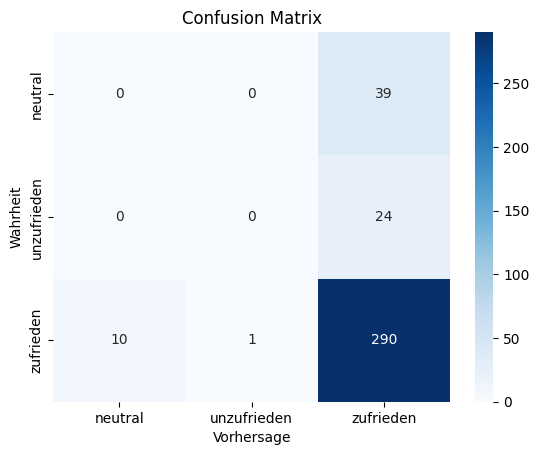

In [73]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Vorhersage")
plt.ylabel("Wahrheit")
plt.savefig("confusion.png", dpi=300, bbox_inches="tight")
plt.show()

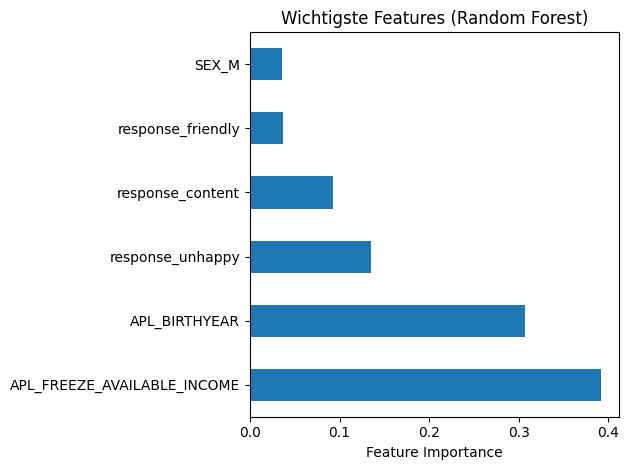

In [74]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind="barh")
plt.title("Wichtigste Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.savefig("features.png", dpi=300, bbox_inches="tight")
plt.show()